In [20]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [22]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.shape

(200, 5)

In [24]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [25]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [26]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Visualization to get some insights of data

Encoding:

Male --> 0 , Female --> 1



In [30]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [31]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


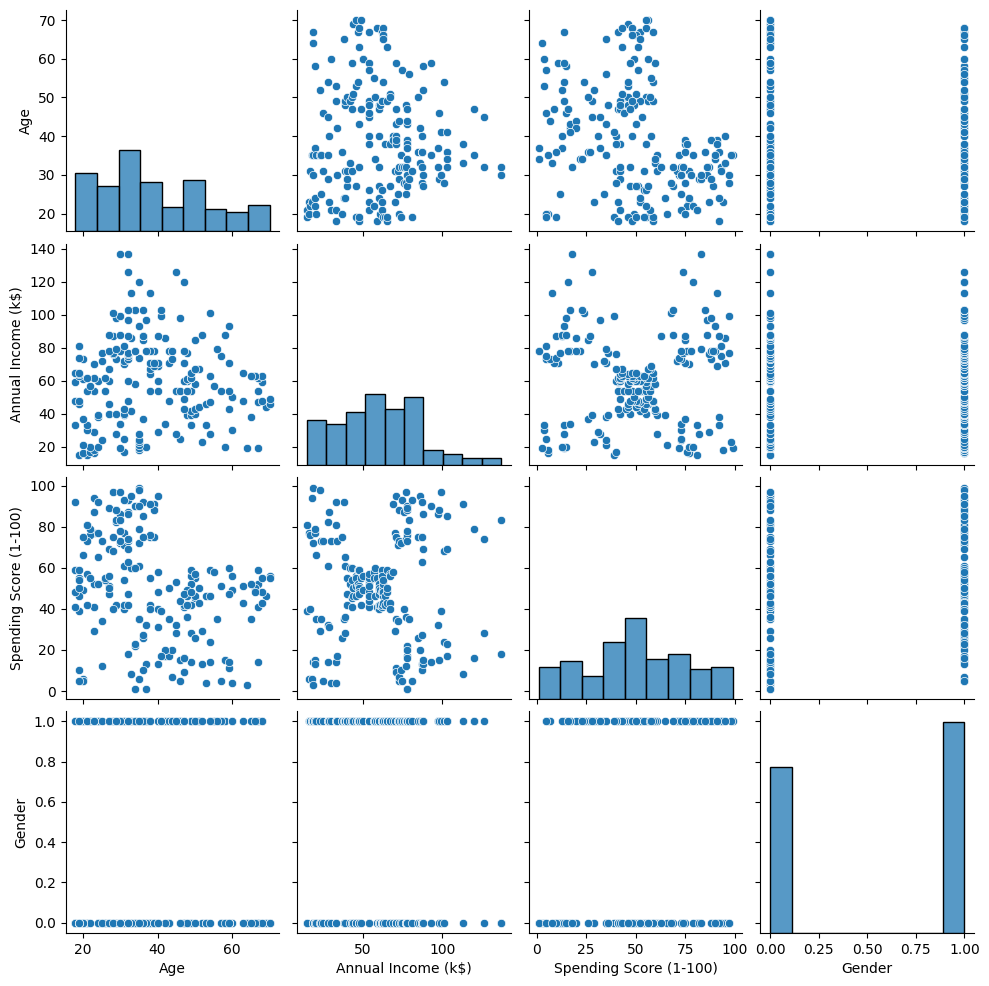

In [32]:
# ---- Multivariant Analysis -----
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']])

Conclusions:

**Age vs Spending Score**	Younger people tend to spend more.

**Annual Income vs Spending Score**

Two dense clusters are visible:

One: High income, low spending

Another: Low-to-mid income, high spending

**Gender Distribution**

Slightly more female customers (value = 1) than male (value = 0), or almost balanced.


<Axes: xlabel='Age', ylabel='Count'>

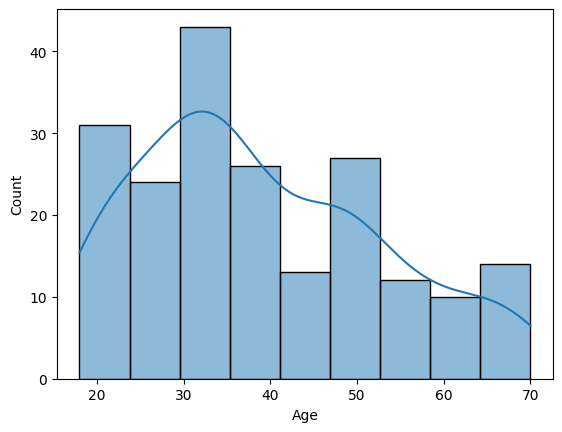

In [34]:
sns.histplot(df['Age'], kde=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

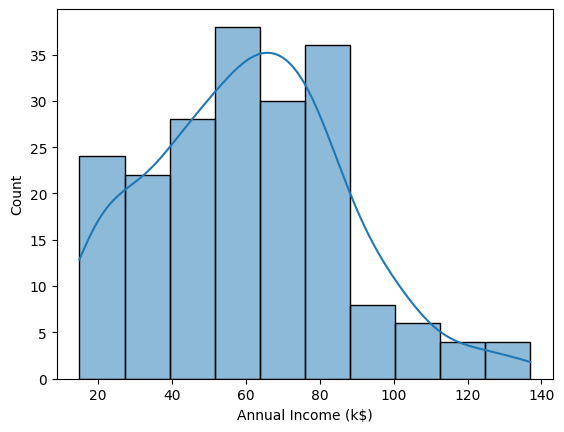

In [35]:
sns.histplot(df['Annual Income (k$)'], kde=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

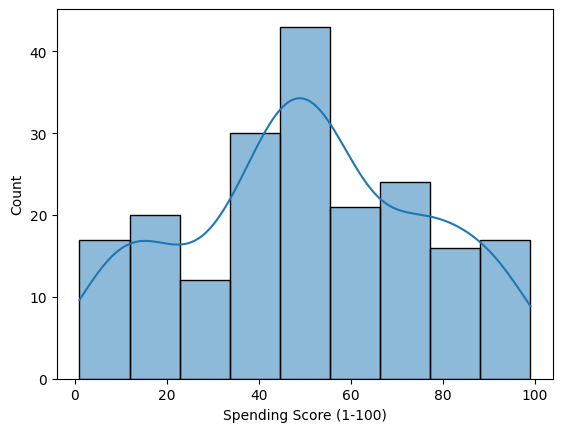

In [36]:
sns.histplot(df['Spending Score (1-100)'], kde=True)

Conclusion:

Age and Annual Income are mostly right skewed .

Spending scare shows the symmetric distribution mostly .


<Axes: xlabel='Gender', ylabel='count'>

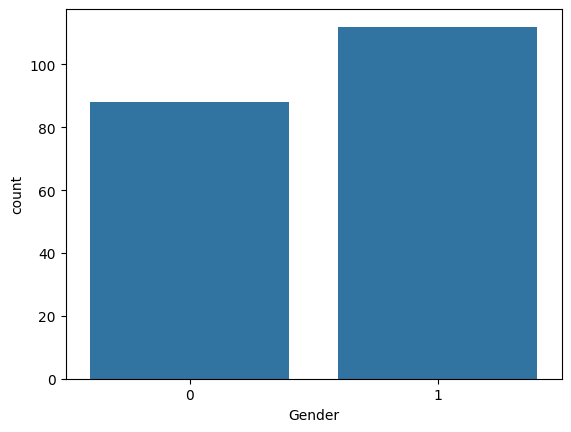

In [37]:
sns.countplot(x='Gender', data=df)

Conclusion:

Females are more in number then men .

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

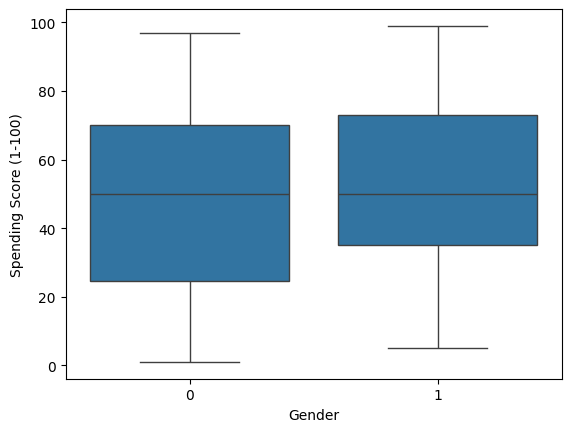

In [38]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

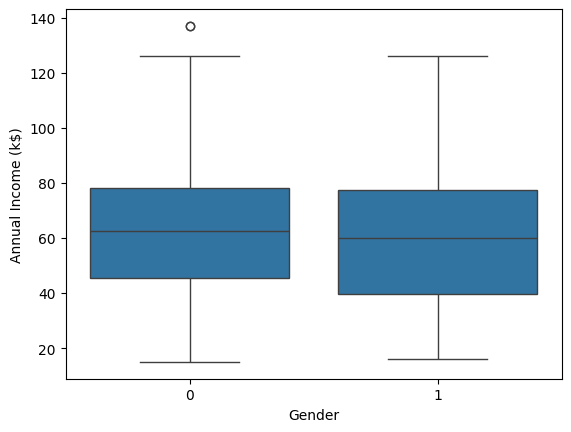

In [39]:
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)

Conclusion:

Spending score for mens is between 20 to 70 where as for females it is between 30 to 75 somethng.

Annual ncome for male and female doesnt vary much.

In [40]:
#---- Feature Selection -----
df.drop('CustomerID', axis=1, inplace=True)

In [41]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [42]:
# ---- Normalize -------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

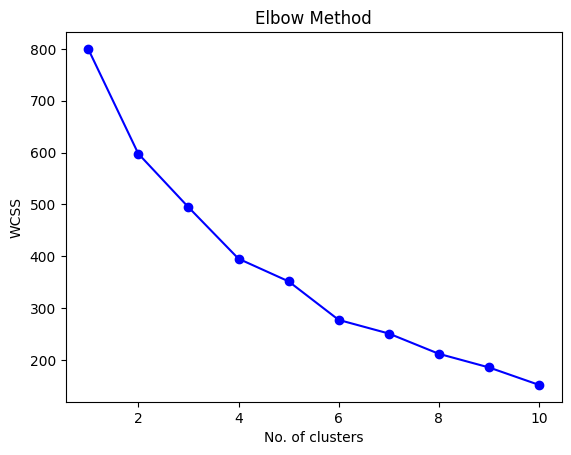

In [43]:
# ----- Finding optimal number of clusters (K) for KMeans -----
# For this we are using elbow method
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

Conclusion:

A point where the rate of decrease in WCSS slows down significantly — this is the "elbow".

In our graph we can see that:

WCSS drops sharply from K=1 to K=3

Then, the decrease slows down between K=4 to K=6

From K=6 onward, the drop is minimal

But we can try with different number of clusters from above graph we can get k as 5 or 6 but we can train and visualize and get best number of clusters

In [54]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

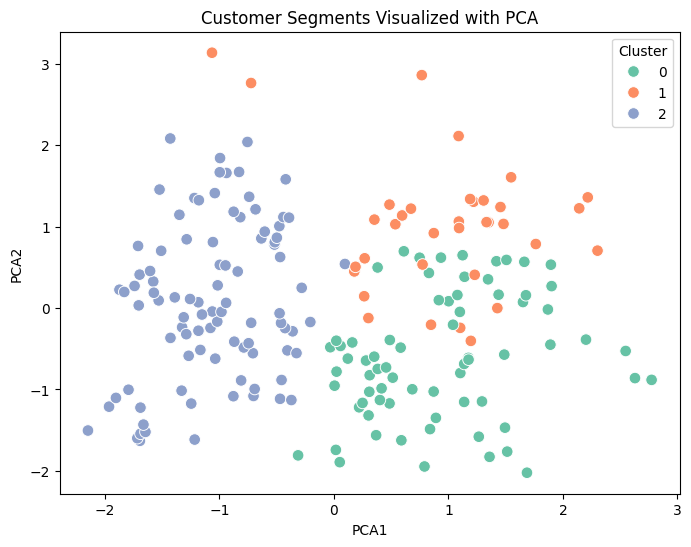

In [55]:
# k = 3
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled)

# Add to DataFrame
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
df['Cluster'] = kmeans.labels_  # Assuming you stored the model as `kmeans`

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title('Customer Segments Visualized with PCA')
plt.show()


In [56]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

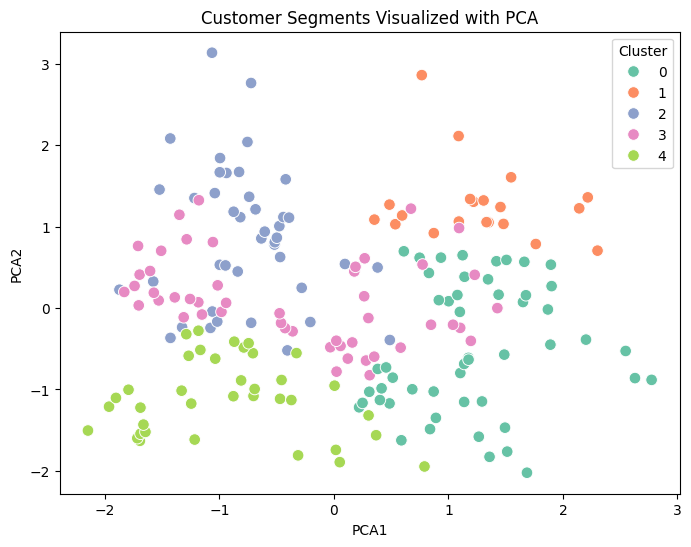

In [57]:
# k = 5
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled)

# Add to DataFrame
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
df['Cluster'] = kmeans.labels_  # Assuming you stored the model as `kmeans`

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title('Customer Segments Visualized with PCA')
plt.show()

In [58]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

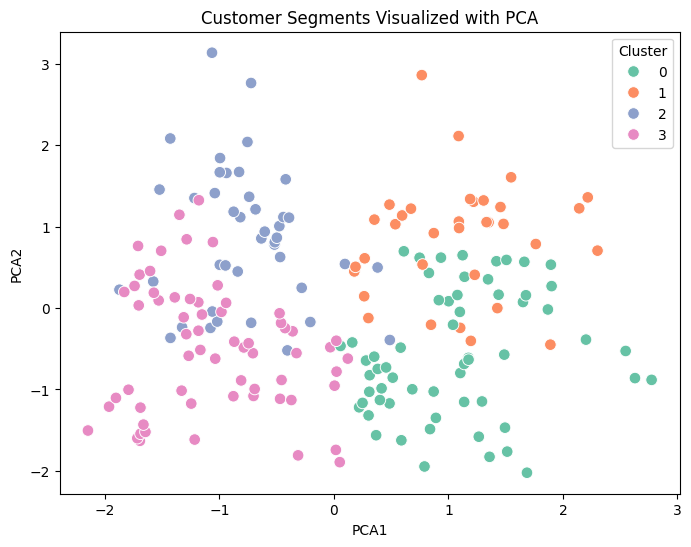

In [59]:
# k = 4
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled)

# Add to DataFrame
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
df['Cluster'] = kmeans.labels_  # Assuming you stored the model as `kmeans`

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title('Customer Segments Visualized with PCA')
plt.show()

Accoeding to me k = 3 and k = 4 is most accurate as clustering is much more better in that.

In [74]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=8)
df['Cluster_DBSCAN'] = dbscan.fit_predict(scaled)

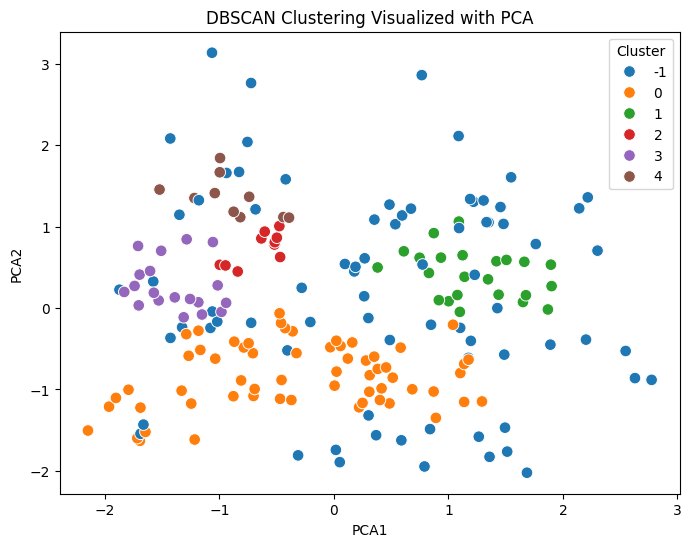

In [75]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Add PCA columns to DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_DBSCAN', palette='tab10', s=70)
plt.title('DBSCAN Clustering Visualized with PCA')
plt.legend(title='Cluster')
plt.show()

DBSCAN is good at identifying non-spherical clusters, and here you can see:

Clusters vary in density and spread

Some clusters (like orange and green) are well-separated

Others are slightly overlapping (like red and purple)
